In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_ID = train['PassengerId']
test_ID = test['PassengerId']
train.drop("PassengerId", axis=1, inplace = True)
test.drop("PassengerId", axis=1, inplace = True)
all_data = pd.concat([train, test], ignore_index=True)
print("Train: ", train.shape[0], "sales, and ", train.shape[1], "features")
print("Test: ", test.shape[0], "sales, and ", test.shape[1], "features")

Train:  891 sales, and  11 features
Test:  418 sales, and  10 features


In [2]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


<AxesSubplot:>

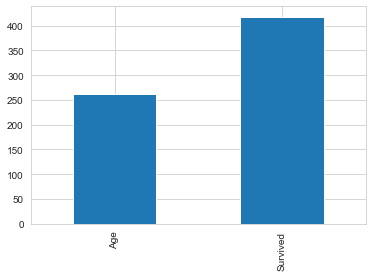

In [57]:
import seaborn as sns
sns.set_style("whitegrid")
missing = all_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

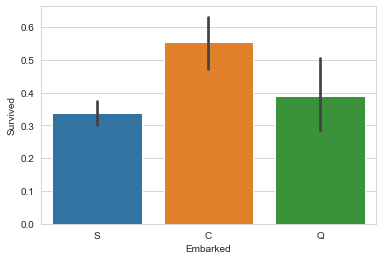

In [6]:
sns.barplot(data=train, x='Embarked', y='Survived')

In [7]:
print('Embarked为"S"的乘客，其生存率为%.2f'%all_data['Survived'][all_data['Embarked']=='S'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.34


In [8]:
print('Embarked为"S"的乘客，其生存率为%.2f'%all_data['Survived'][all_data['Embarked']=='C'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.55


In [9]:
print('Embarked为"S"的乘客，其生存率为%.2f'%all_data['Survived'][all_data['Embarked']=='Q'].value_counts(normalize=True)[1])

Embarked为"S"的乘客，其生存率为0.39


/Users/dizhu/envs/p3/lib/python3.9/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


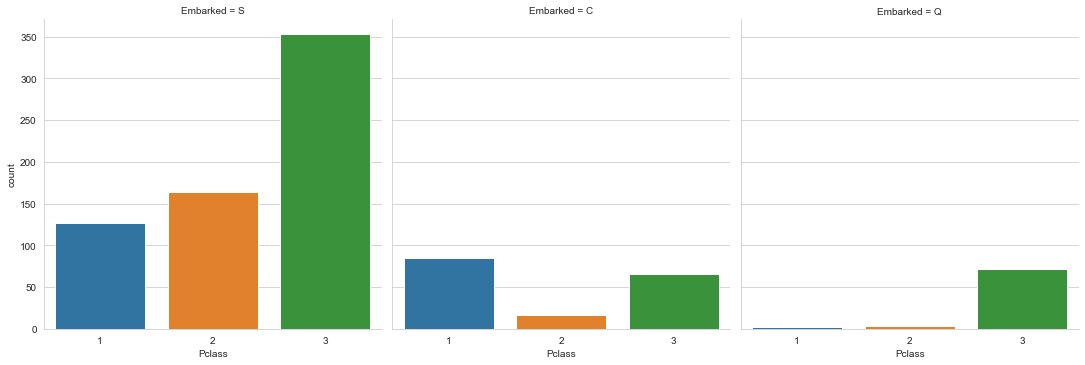

In [10]:
sns.factorplot(data=train, x="Pclass", col="Embarked", kind='count')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

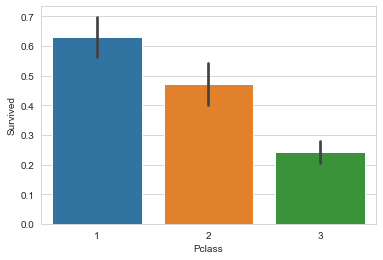

In [11]:
sns.barplot(data=train, x='Pclass', y='Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

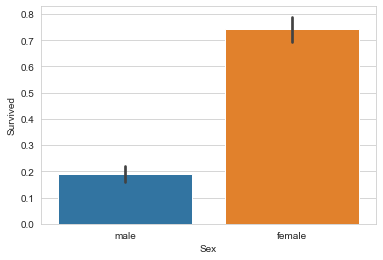

In [12]:
sns.barplot(data=train, x='Sex',y='Survived')

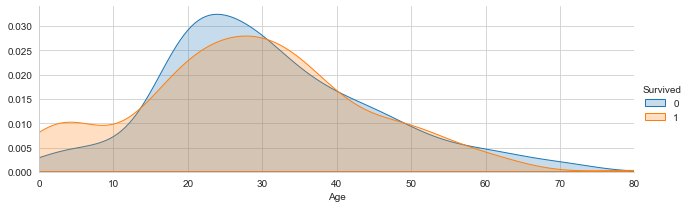

In [13]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
#作图，选择图形类型
ageFacet.map(sns.kdeplot,'Age',shade=True)
#其他信息：坐标轴范围、标签等
ageFacet.set(xlim=(0,train['Age'].max()))
ageFacet.add_legend()

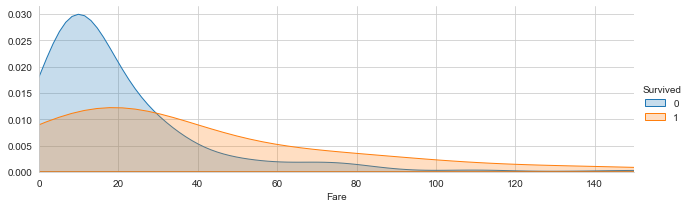

In [14]:
ageFacet=sns.FacetGrid(train,hue='Survived',aspect=3)
ageFacet.map(sns.kdeplot,'Fare',shade=True)
ageFacet.set(xlim=(0,150))
ageFacet.add_legend()

/Users/dizhu/envs/p3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


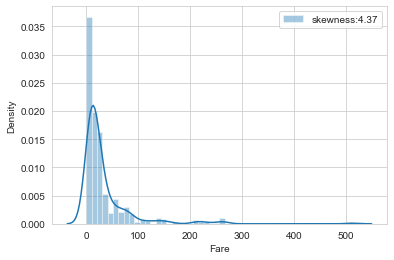

In [17]:
farePlot=sns.distplot(all_data['Fare'][all_data['Fare'].notnull()],label='skewness:%.2f'%(all_data['Fare'].skew()))
farePlot.legend(loc='best')

In [27]:
all_data['Fare']=all_data['Fare'].map(lambda x: np.log(x) if x>0 else 0)

In [28]:
all_data['Cabin']=all_data['Cabin'].fillna('U')

In [29]:
all_data['Cabin'].head()

0       U
1     C85
2       U
3    C123
4       U
Name: Cabin, dtype: object

In [31]:
all_data['Sex']=all_data['Sex'].map({'male':0, 'female':1})

In [53]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [54]:
all_data['Embarked']=all_data['Embarked'].fillna('C')

In [59]:
all_data.loc[all_data.Name=='Storey, Mr. Thomas']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,0,U,S


In [61]:
all_data['FamilyGroup'] = all_data['Surname'].apply(lambda x:Surname_Count[x])

In [64]:
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=12) | (all_data['Sex']=='female'))]
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>12) & (all_data['Sex']=='male')]

In [65]:
Female_Child=pd.DataFrame(Female_Child_Group.groupby('Surname')['Survived'].mean().value_counts())
Female_Child.columns=['GroupCount']
Female_Child

,GroupCount
1.000000,29
0.000000,10
0.666667,1
0.500000,1


Text(0.5, 0, 'AverageSurvived')

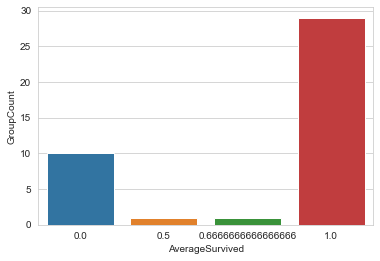

In [66]:
sns.barplot(x=Female_Child.index, y=Female_Child["GroupCount"]).set_xlabel('AverageSurvived')

In [67]:
Male_Adult=pd.DataFrame(Male_Adult_Group.groupby('Surname')['Survived'].mean().value_counts())
Male_Adult.columns=['GroupCount']
Male_Adult

,GroupCount


In [85]:
c = np.array([[0, 2, 1], [3, 5, 6], [0, 1, 1]])
c.sum(axis=1)

array([ 3, 14,  2])